In [3]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Jevan\OneDrive\Desktop\Data\sample_orders_expanded.csv")

# Cleaning

## 1. Analyze data set

In [4]:
df.head()
df.shape

(107, 6)

In [5]:
print(df.isnull().sum())

order_id       0
customer_id    0
product        0
quantity       0
price          1
order_date     0
dtype: int64


## 2. Drop the missing value

In [6]:
df_clean = df.dropna(subset=['price'])
print(df_clean.isnull().sum())

df_clean.shape

order_id       0
customer_id    0
product        0
quantity       0
price          0
order_date     0
dtype: int64


(106, 6)

In [7]:
df['price'] = df['price'].fillna(df['price'].mean())

In [8]:
print(df.isnull().sum())

df.shape

order_id       0
customer_id    0
product        0
quantity       0
price          0
order_date     0
dtype: int64


(107, 6)

In [9]:
df

,order_id,customer_id,product,quantity,price,order_date
0,101,1,Laptop,1,1000.000000,2024-01-15
1,102,2,Mouse,2,25.000000,2024-01-16
2,103,3,Keyboard,1,45.000000,2024-01-16
3,104,2,Monitor,1,227.783019,2024-01-17
4,105,4,Laptop,2,1000.000000,2024-01-18
...,...,...,...,...,...,...
102,203,16,Keyboard,4,45.000000,2024-01-21 00:00:00
103,204,17,Laptop,4,1000.000000,2024-02-15 00:00:00
104,205,14,Webcam,2,75.000000,2024-01-21 00:00:00
105,206,9,Webcam,4,75.000000,2024-02-16 00:00:00


## 3. Check if there are any wrong data types

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   order_id     107 non-null    int64  
 1   customer_id  107 non-null    int64  
 2   product      107 non-null    object 
 3   quantity     107 non-null    int64  
 4   price        107 non-null    float64
 5   order_date   107 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.1+ KB


In [11]:
df['price'] = df['price'].round(2)

In [12]:
df['order_date'] = pd.to_datetime(df['order_date'], format='mixed')
df['order_date'] = df['order_date'].dt.date

In [13]:
df

,order_id,customer_id,product,quantity,price,order_date
0,101,1,Laptop,1,1000.00,2024-01-15
1,102,2,Mouse,2,25.00,2024-01-16
2,103,3,Keyboard,1,45.00,2024-01-16
3,104,2,Monitor,1,227.78,2024-01-17
4,105,4,Laptop,2,1000.00,2024-01-18
...,...,...,...,...,...,...
102,203,16,Keyboard,4,45.00,2024-01-21
103,204,17,Laptop,4,1000.00,2024-02-15
104,205,14,Webcam,2,75.00,2024-01-21
105,206,9,Webcam,4,75.00,2024-02-16


## 4. Check for duplicates

In [14]:
duplicates = df.duplicated().sum()
if duplicates > 0:
    df.drop_duplicates()
    print(f"{duplicates} dropped")
else:
    print("no duplicates")

no duplicates


## 5. Fix inconsistencies in text data

In [15]:
df['product'] = df['product'].str.strip()
df['product'] = df['product'].str.lower()

In [16]:
df

,order_id,customer_id,product,quantity,price,order_date
0,101,1,laptop,1,1000.00,2024-01-15
1,102,2,mouse,2,25.00,2024-01-16
2,103,3,keyboard,1,45.00,2024-01-16
3,104,2,monitor,1,227.78,2024-01-17
4,105,4,laptop,2,1000.00,2024-01-18
...,...,...,...,...,...,...
102,203,16,keyboard,4,45.00,2024-01-21
103,204,17,laptop,4,1000.00,2024-02-15
104,205,14,webcam,2,75.00,2024-01-21
105,206,9,webcam,4,75.00,2024-02-16


## 6. Make total price column

In [17]:
df['total_price'] = df['quantity'] * df['price']

In [18]:
df

,order_id,customer_id,product,quantity,price,order_date,total_price
0,101,1,laptop,1,1000.00,2024-01-15,1000.00
1,102,2,mouse,2,25.00,2024-01-16,50.00
2,103,3,keyboard,1,45.00,2024-01-16,45.00
3,104,2,monitor,1,227.78,2024-01-17,227.78
4,105,4,laptop,2,1000.00,2024-01-18,2000.00
...,...,...,...,...,...,...,...
102,203,16,keyboard,4,45.00,2024-01-21,180.00
103,204,17,laptop,4,1000.00,2024-02-15,4000.00
104,205,14,webcam,2,75.00,2024-01-21,150.00
105,206,9,webcam,4,75.00,2024-02-16,300.00


## 7. Outlier detection 

In [19]:
from scipy.stats import zscore

df['Zscore'] = zscore(df['total_price'])
outliers = df[df['Zscore'].abs() > 3]
df['isoutlier'] = (df['Zscore'].abs() > 3)
del df['Zscore']

In [20]:
df = df[df['isoutlier'] == False]
del df['isoutlier']

In [21]:
df

,order_id,customer_id,product,quantity,price,order_date,total_price
0,101,1,laptop,1,1000.00,2024-01-15,1000.00
1,102,2,mouse,2,25.00,2024-01-16,50.00
2,103,3,keyboard,1,45.00,2024-01-16,45.00
3,104,2,monitor,1,227.78,2024-01-17,227.78
4,105,4,laptop,2,1000.00,2024-01-18,2000.00
...,...,...,...,...,...,...,...
101,202,15,laptop,1,1000.00,2024-02-15,1000.00
102,203,16,keyboard,4,45.00,2024-01-21,180.00
104,205,14,webcam,2,75.00,2024-01-21,150.00
105,206,9,webcam,4,75.00,2024-02-16,300.00


# Revenue Analysis

### Total customer revenue

In [22]:
revenue_per_customer = df.groupby('customer_id')['total_price'].sum().reset_index()
print(revenue_per_customer)

    customer_id  total_price
0             1      2510.00
1             2      2932.78
2             3      1390.00
3             4      2280.00
4             5      2270.00
5             6      1665.00
6             7      1065.00
7             8      1500.00
8             9      1795.00
9            10      2095.00
10           11       780.00
11           12      1650.00
12           13      2405.00
13           14       330.00
14           15      1475.00
15           16      2980.00
16           17       490.00
17           18       340.00
18           19      2380.00
19           20      1495.00


### Total revenue by day

In [23]:
revenue_by_day = df.groupby('order_date')['total_price'].sum()
print(revenue_by_day)

order_date
2024-01-15    1000.00
2024-01-16      95.00
2024-01-17     227.78
2024-01-18    2025.00
2024-01-19    1545.00
2024-01-20     400.00
2024-01-21     535.00
2024-01-22     640.00
2024-01-23     160.00
2024-01-24    1325.00
2024-01-25    2635.00
2024-01-26    3415.00
2024-01-27    1085.00
2024-01-29     180.00
2024-01-30    1300.00
2024-01-31     480.00
2024-02-01     775.00
2024-02-02    2625.00
2024-02-03    1695.00
2024-02-04    1065.00
2024-02-05    1000.00
2024-02-06    2080.00
2024-02-07    1125.00
2024-02-08      90.00
2024-02-09     130.00
2024-02-10     240.00
2024-02-11     430.00
2024-02-12     400.00
2024-02-13     375.00
2024-02-14    1205.00
2024-02-15    1310.00
2024-02-16     950.00
2024-02-17    1285.00
Name: total_price, dtype: float64


### Unique customers

In [24]:
df['customer_id'].nunique() # total

20

In [25]:
df['customer_id'].unique() # list of cust

array([ 1,  2,  3,  4,  5,  7, 11, 19, 12, 10, 15,  9, 14, 18, 16,  8, 13,
       17,  6, 20], dtype=int64)

### Most sold products

In [26]:
df['product'].value_counts().reset_index()

,product,count
0,monitor,25
1,keyboard,19
2,mouse,18
3,usb hub,11
4,webcam,10
5,desk lamp,10
6,laptop,9


# Code for visualization

### Which product had the highest total quantitiy ordered and what are the total sales per product?

##### Highest total quantity ordered 

In [27]:
most_popular = df.groupby('product')['quantity'].sum().sort_values(ascending=False).reset_index()
print(most_popular)

     product  quantity
0    monitor        54
1      mouse        50
2   keyboard        41
3  desk lamp        30
4    usb hub        27
5     webcam        25
6     laptop        10


##### Total sales per product

In [28]:
total_sales_product = df.groupby('product')['total_price'].sum().sort_values(ascending=False).reset_index()
print(total_sales_product)

     product  total_price
0    monitor     15977.78
1     laptop     10000.00
2     webcam      1875.00
3   keyboard      1845.00
4  desk lamp      1800.00
5      mouse      1250.00
6    usb hub      1080.00


##### Quantity and sales merged for visualizations

In [29]:
product_summary = pd.merge(total_sales_product, most_popular, on='product')
product_summary

,product,total_price,quantity
0,monitor,15977.78,54
1,laptop,10000.00,10
2,webcam,1875.00,25
3,keyboard,1845.00,41
4,desk lamp,1800.00,30
5,mouse,1250.00,50
6,usb hub,1080.00,27


### Daily sales trend

In [31]:
sales_per_day = df.groupby('order_date')['total_price'].sum().reset_index()
print(sales_per_day)

    order_date  total_price
0   2024-01-15      1000.00
1   2024-01-16        95.00
2   2024-01-17       227.78
3   2024-01-18      2025.00
4   2024-01-19      1545.00
5   2024-01-20       400.00
6   2024-01-21       535.00
7   2024-01-22       640.00
8   2024-01-23       160.00
9   2024-01-24      1325.00
10  2024-01-25      2635.00
11  2024-01-26      3415.00
12  2024-01-27      1085.00
13  2024-01-29       180.00
14  2024-01-30      1300.00
15  2024-01-31       480.00
16  2024-02-01       775.00
17  2024-02-02      2625.00
18  2024-02-03      1695.00
19  2024-02-04      1065.00
20  2024-02-05      1000.00
21  2024-02-06      2080.00
22  2024-02-07      1125.00
23  2024-02-08        90.00
24  2024-02-09       130.00
25  2024-02-10       240.00
26  2024-02-11       430.00
27  2024-02-12       400.00
28  2024-02-13       375.00
29  2024-02-14      1205.00
30  2024-02-15      1310.00
31  2024-02-16       950.00
32  2024-02-17      1285.00


### Orders placed each day

In [32]:
orders_per_day = df.groupby('order_date')['order_id'].count().reset_index()
print(orders_per_day)

    order_date  order_id
0   2024-01-15         1
1   2024-01-16         2
2   2024-01-17         1
3   2024-01-18         2
4   2024-01-19         9
5   2024-01-20         2
6   2024-01-21         5
7   2024-01-22         5
8   2024-01-23         1
9   2024-01-24         4
10  2024-01-25         5
11  2024-01-26         7
12  2024-01-27         3
13  2024-01-29         1
14  2024-01-30         2
15  2024-01-31         2
16  2024-02-01         4
17  2024-02-02         5
18  2024-02-03         4
19  2024-02-04         3
20  2024-02-05         1
21  2024-02-06         3
22  2024-02-07         2
23  2024-02-08         1
24  2024-02-09         2
25  2024-02-10         1
26  2024-02-11         4
27  2024-02-12         2
28  2024-02-13         2
29  2024-02-14         3
30  2024-02-15         5
31  2024-02-16         3
32  2024-02-17         5


### Total sales per customer

In [30]:
total_sales_customer = df.groupby('customer_id')['total_price'].sum().sort_values(ascending=False).reset_index()
print(total_sales_customer)

    customer_id  total_price
0            16      2980.00
1             2      2932.78
2             1      2510.00
3            13      2405.00
4            19      2380.00
5             4      2280.00
6             5      2270.00
7            10      2095.00
8             9      1795.00
9             6      1665.00
10           12      1650.00
11            8      1500.00
12           20      1495.00
13           15      1475.00
14            3      1390.00
15            7      1065.00
16           11       780.00
17           17       490.00
18           18       340.00
19           14       330.00


#### Top 5 customers

In [42]:
# select top 5 customers
top_n = 5
top_customers = total_sales_customer.nlargest(top_n, 'total_price')

In [43]:
top_customers

,customer_id,total_price
0,16,2980.00
1,2,2932.78
2,1,2510.00
3,13,2405.00
4,19,2380.00


# Visualization

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import numpy as np

In [34]:
%matplotlib inline  

### Which product had the highest total quantitiy ordered and what are the total sales per product? (Bar Chart)

C:\Users\Jevan\AppData\Local\Temp\ipykernel_25932\2291599158.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set3', len(product_summary))


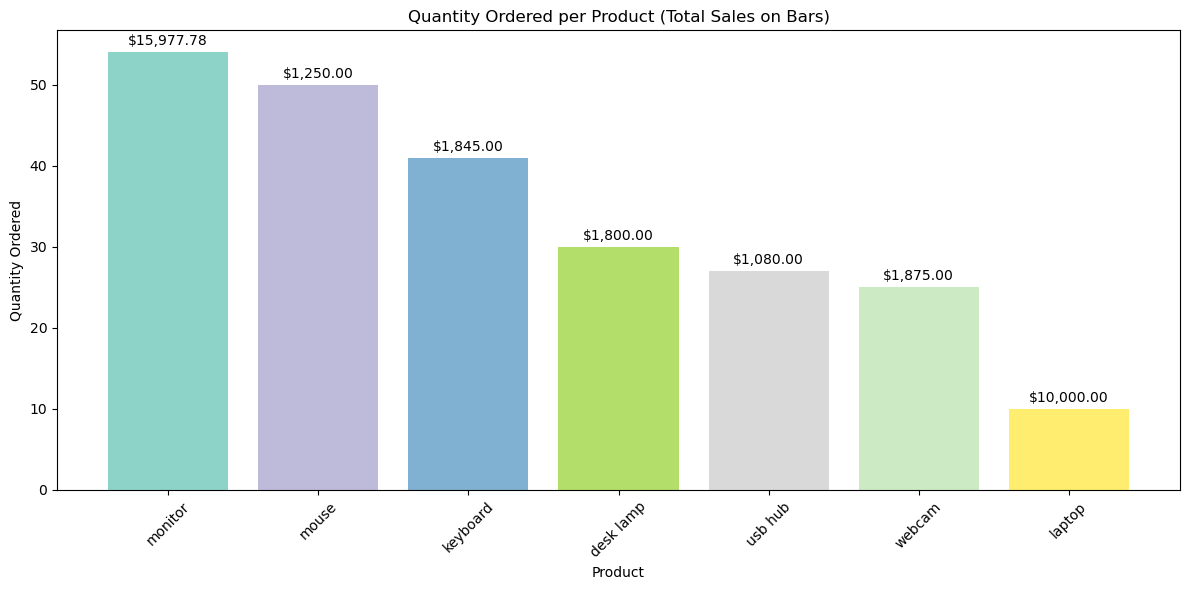

In [35]:
product_summary = product_summary.sort_values('quantity', ascending=False)

# colors
cmap = cm.get_cmap('Set3', len(product_summary))
colors = cmap(np.arange(len(product_summary)))

plt.figure(figsize=(12, 6))
bars = plt.bar(product_summary['product'], product_summary['quantity'], color=colors)

# Add labels on top
for bar, sales in zip(bars, product_summary['total_price']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'${sales:,.2f}', ha='center', va='bottom', fontsize=10)

# Labels & layout
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Quantity Ordered per Product (Total Sales on Bars)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Comments (Bar Chart)


We can see that monitors had the highest quantity ordered and total sales while laptops are the lowest quantity sold. But in terms of revenue laptop actually comes in second. Mouse and keybaords both have high quantity ordered but there is more revenue gain in the keybaords. This shows that low cost items like mouse have a lot of volumne but little revenue while laptop is the total opposite as it has fewer sales but generate a large revenue.

This basically shows that having a high amount of sales does not directly correlate to having a high amount of revenue

Seeing that webcam and usb hub are very weak in orders. A suggestion to increase the sales would be bundling the big sales items like monitor or mouse with usb hub or webcam to increase their sales.

In [36]:
threshold_o = orders_per_day['order_id'].quantile(0.90)
spike_days_o = orders_per_day[orders_per_day['order_id'] >= threshold_o]

### Quantities Sold Per Day

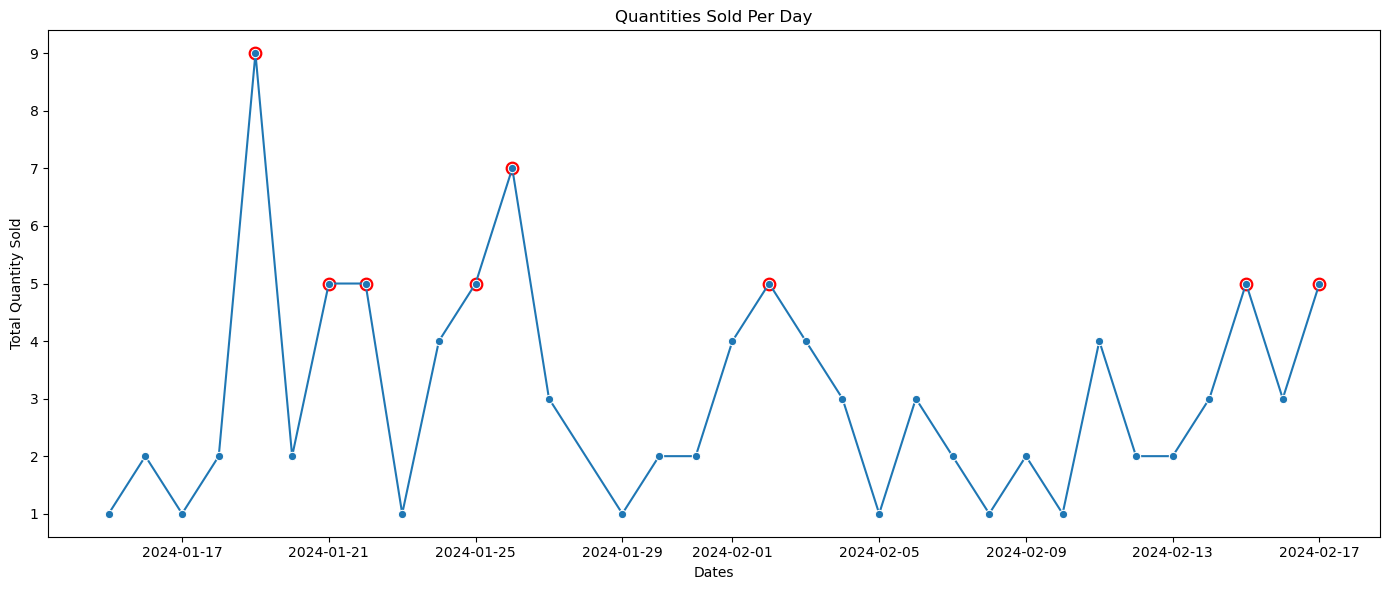

In [37]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=orders_per_day, x='order_date', y='order_id', marker='o')

for x, y in zip(spike_days_o['order_date'], spike_days_o['order_id']):
    plt.scatter(x, y, color='red', s=80, label='Revenue Spike' if x == spike_days_o['order_id'].iloc[0] else "")
    
plt.title('Quantities Sold Per Day')
plt.xlabel('Dates')
plt.ylabel('Total Quantity Sold')
plt.tight_layout()
plt.show()

### Revenue Earned Per Day

In [38]:
threshold_r = sales_per_day['total_price'].quantile(0.90)
spike_days_r = sales_per_day[sales_per_day['total_price'] >= threshold_r]

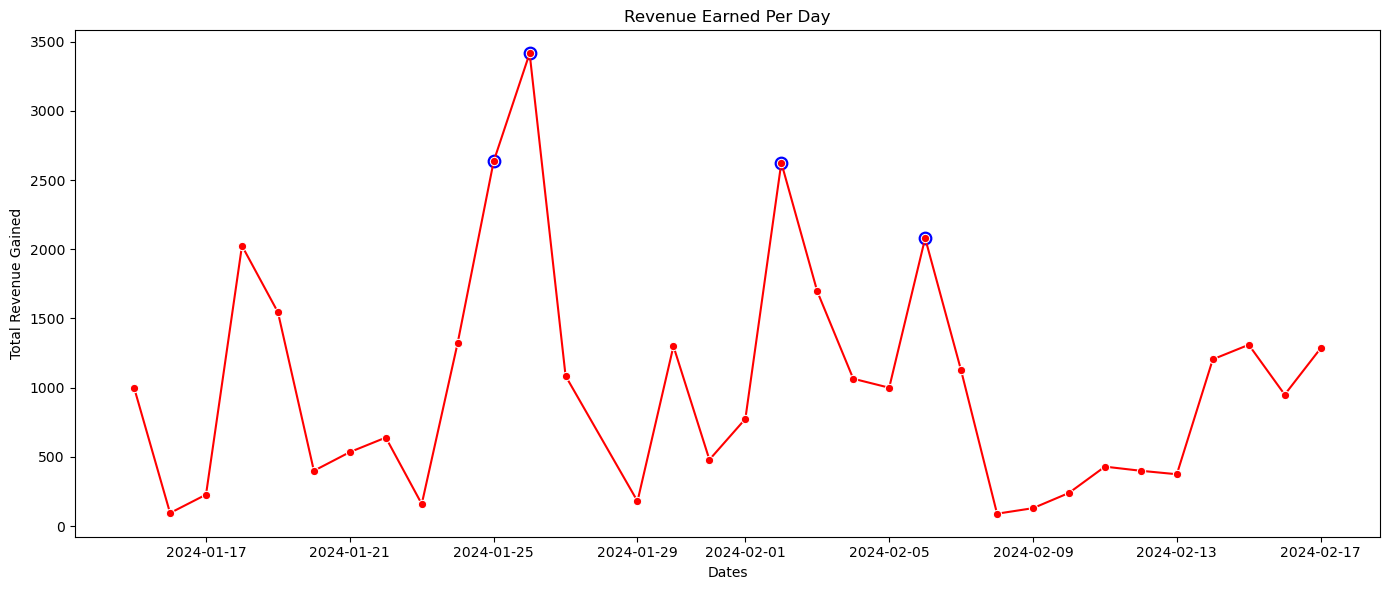

In [39]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=sales_per_day, x='order_date', y='total_price', marker='o', color='red')

for x, y in zip(spike_days_r['order_date'], spike_days_r['total_price']):
    plt.scatter(x, y, color='blue', s=80, label='Revenue Spike' if x == spike_days_r['order_date'].iloc[0] else "")
    
plt.title('Revenue Earned Per Day')
plt.xlabel('Dates')
plt.ylabel('Total Revenue Gained')
plt.tight_layout()
plt.show()

#### Comments (Line Chart)

From both the graph we can see that the unit sales are relatively steady while the revenue earned will fluctuate quite a lot. And just like the bar chart previously, This line chart also tells us that the revenue earned and the quantities sold are not directly correlated. We can clearly see as the two line graphs peak at very different days. 

But from what is seen everytime the revenue has a spike the quantities sold would also have somewhat of a spike although not as high. This would mean that high revenue days would typically mean taht there is a moderate increase in the items ordered. 

This tells us that the revenue spikes have somewhat to do with the big ticket items which from looking at the bar chart previously we know is the monitor having the highest amount of revenue and orders


### Which customers give the most revenue?

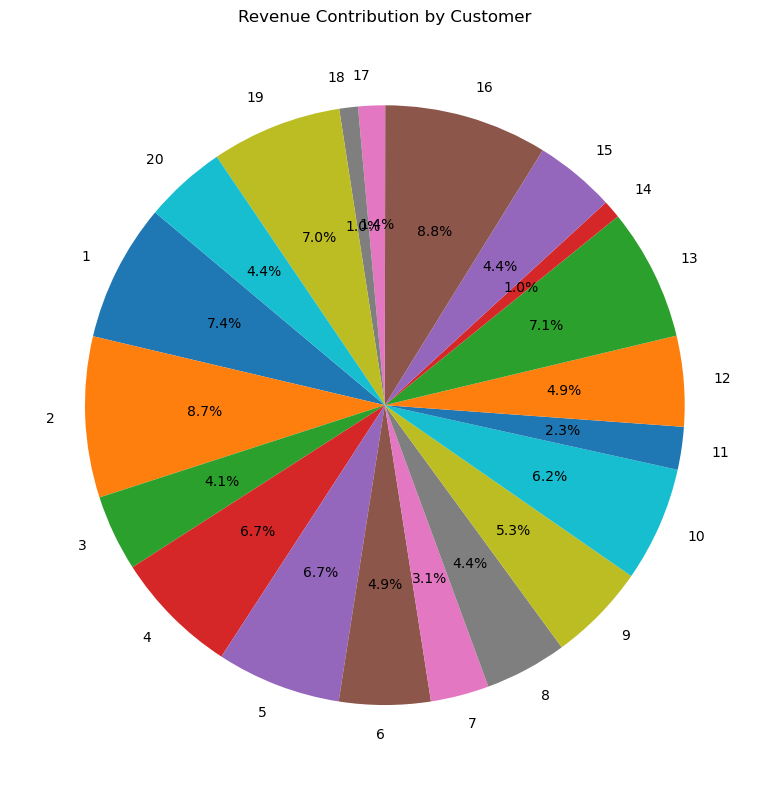

In [40]:
plt.figure(figsize=(8, 8))
plt.pie(
    revenue_per_customer['total_price'],
    labels=revenue_per_customer['customer_id'],
    autopct='%1.1f%%',
    startangle=140
)

plt.title('Revenue Contribution by Customer')
plt.tight_layout()
plt.show()

In [45]:
# put the remainder in others
others_total = total_sales_customer['total_price'].sum() - top_customers['total_price'].sum()
others_row = pd.DataFrame([{
    'customer_id': 'Others',
    'total_price': others_total
}]) 

# Combine top customers and others
pie_data = pd.concat([top_customers, others_row], ignore_index=True)

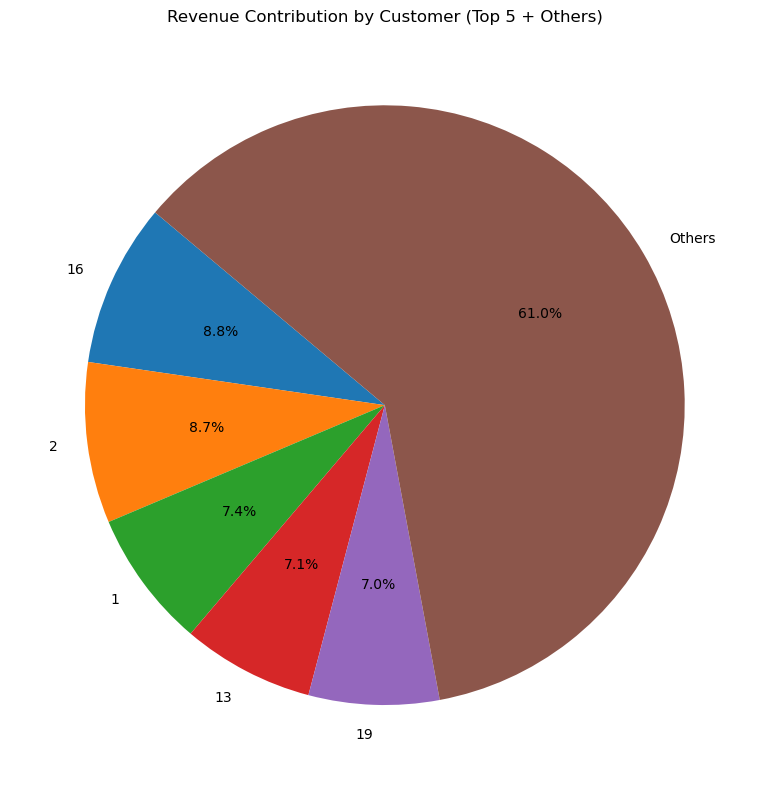

In [48]:
# pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    pie_data['total_price'],
    labels=pie_data['customer_id'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Revenue Contribution by Customer (Top 5 + Others)')
plt.tight_layout()
plt.show()

#### Comments (Pie Chart)

The chart above is a pie chart that tells us who the top contributors to the revenue are. Its quite hard to see in the first pie chart due to there being no outliers or data that stand out, So I created a second chart showing the top 5 users and filtering the rest as others.

Now we can clearly see that the top customer is customer number 16 with number 2 being in second place. There are no major outliers between the customers, they are all evenly contributing to the revenue but some just a small bit more than others. 

This is a good thing as it shows that the business is not supported by only one big spender but infact a multitude of customers chipping in to meet the revenue.